# **Segmentación RFM con Python**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import datetime

In [2]:
data = pd.read_csv("./data/train.csv")
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


### **Analizando el dataframe**

In [4]:
print(f'El dataframe tiene {data.shape[0]} filas y {data.shape[1]} columnas.')

El dataframe tiene 9800 filas y 18 columnas.


In [6]:
print("Columnas del dataset")
data.columns

Columnas del dataset


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [5]:
print("Tipo de dato de las columnas")
data.dtypes

Tipo de dato de las columnas


Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

In [11]:
# Convertir tipo de dato 'object' a datetime de las columnas 'Order Date' y 'Ship Date'
data["Order Date"] = pd.to_datetime(data["Order Date"]).dt.strftime("%Y%m%d")
data["Ship Date"] = pd.to_datetime(data["Ship Date"]).dt.strftime("%Y%m%d")

In [18]:
data["Order Month"] = data["Order Date"].apply(lambda x : x[:6])
data["Ship Month"] = data["Ship Date"].apply(lambda x : x[:6])

### **Análisis Exploratorio de Datos**

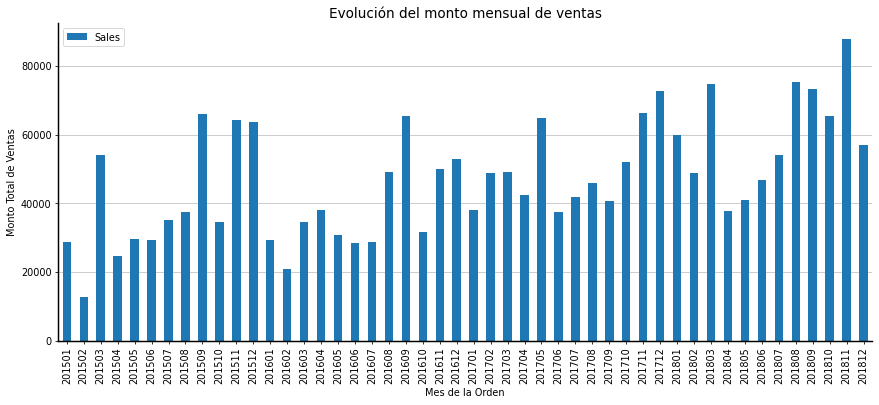

In [28]:
fig, ax = plt.subplots(figsize = (15,6), dpi = 70)
pd.DataFrame(data.groupby("Order Month")["Sales"].sum()).plot(ax = ax, kind = 'bar')
for i in ['bottom', 'left']:
    ax.spines[i].set_color('black')
    ax.spines[i].set_linewidth(1.5) 
right_side = ax.spines["right"]
right_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)
ax.set_axisbelow(True)
ax.grid(color='gray', linewidth=1, axis='y', alpha=0.4)
plt.xlabel("Mes de la Orden")
plt.ylabel("Monto Total de Ventas")
plt.title("Evolución del monto mensual de ventas", size = 14)
plt.show()